In [1]:
import numpy as np
import xroms
import xarray as xr
from glob import glob
import pandas as pd
%matplotlib inline

In [2]:
files = glob('/srv/scratch/z3533156/20year_run_tide/outer_avg/outer_avg_*.nc')
# A basic chunk choice
chunks = {'ocean_time':1}

ds = xroms.open_mfnetcdf(files, chunks=chunks)

In [3]:
ds.temp

<xarray.DataArray 'temp' (ocean_time: 8308, s_rho: 30, eta_rho: 317, xi_rho: 272)>
dask.array<concatenate, shape=(8308, 30, 317, 272), dtype=float32, chunksize=(1, 30, 317, 272), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
    lon_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
    lat_rho     (eta_rho, xi_rho) float64 dask.array<chunksize=(317, 272), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-02 1994-01-03 ... 2016-09-30
  * xi_rho      (xi_rho) int64 0 1 2 3 4 5 6 7 ... 265 266 267 268 269 270 271
  * eta_rho     (eta_rho) int64 0 1 2 3 4 5 6 7 ... 310 311 312 313 314 315 316
    z_rho       (ocean_time, s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(1, 30, 317, 272), meta=np.ndarray>
    z_rho0      (s_rho, eta_rho, xi_rho) float64 dask.array<chunksize=(30, 317, 272), meta=np.ndarray>
Attributes:
    long_name:  time-averaged potential temperature
    units:      Celsius
    time:       ocean_time
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...
    location:   face
    field:      temperature, scalar, series

In [4]:
lon0, lat0 = 151.31, -33.9
tempsel = ds.temp.xroms.sel2d(lon0, lat0)
tempsel

<xarray.DataArray 'temp' (ocean_time: 8308, s_rho: 30)>
dask.array<getitem, shape=(8308, 30), dtype=float32, chunksize=(1, 30), chunktype=numpy.ndarray>
Coordinates:
  * s_rho       (s_rho) float64 -0.9715 -0.9156 -0.8614 ... -0.0156 -0.004799
    lon_rho     float64 dask.array<chunksize=(), meta=np.ndarray>
    lat_rho     float64 dask.array<chunksize=(), meta=np.ndarray>
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-02 1994-01-03 ... 2016-09-30
    xi_rho      int64 68
    eta_rho     int64 122
    z_rho       (ocean_time, s_rho) float64 dask.array<chunksize=(1, 30), meta=np.ndarray>
    z_rho0      (s_rho) float64 dask.array<chunksize=(30,), meta=np.ndarray>
Attributes:
    long_name:  time-averaged potential temperature
    units:      Celsius
    time:       ocean_time
    grid:       <xgcm.Grid>\nX Axis (not periodic, boundary=None):\n  * cente...
    location:   face
    field:      temperature, scalar, series

In [5]:
from dask.diagnostics import ProgressBar
ProgressBar().register()

In [7]:
ds['temp_20m'] = xroms.isoslice(ds.temp, -20).load()

[                                        ] | 0% Completed |  3.5s

/home/z3526974/miniconda3/lib/python3.7/site-packages/xgcm/transform.py:60: RuntimeWarning: invalid value encountered in _interp_1d_linear
  return _interp_1d_linear(phi, theta, target_theta_levels, mask_edges)


[########################################] | 100% Completed | 22min 23.8s


In [18]:
lon0, lat0 = 151.31, -33.9
temp_20m_ORS65 = ds.temp_20m.xroms.sel2d(lon0, lat0).load()
del temp_20m_ORS65.attrs['grid']
temp_20m_ORS65

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s


<xarray.DataArray 'temp_20m' (ocean_time: 8308, z_rho: 1)>
array([[21.01008052],
       [20.64212694],
       [21.07076187],
       ...,
       [18.81233012],
       [18.78977035],
       [18.56049608]])
Coordinates:
    lon_rho     float64 151.3
    lat_rho     float64 -33.9
  * ocean_time  (ocean_time) datetime64[ns] 1994-01-02 1994-01-03 ... 2016-09-30
    xi_rho      int64 68
    eta_rho     int64 122
  * z_rho       (z_rho) int64 -20
Attributes:
    long_name:  time-averaged potential temperature
    units:      Celsius
    time:       ocean_time
    location:   face
    field:      temperature, scalar, series

In [21]:
#temp_20m_ORS65.to_netcdf("ROMS_barra_20m_temp_ORS65")

df = temp_20m_ORS65.to_dataframe()

In [23]:
test = df.to_xarray()

In [25]:
test.to_netcdf("ROMS_barra_20m_temp_ORS65")

In [26]:
da = xr.open_dataset("ROMS_barra_20m_temp_ORS65")

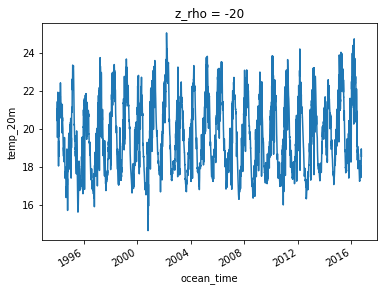

In [30]:
da.temp_20m.plot()